In [1]:
# preproccessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
data = pd.read_csv("early_diabetes_detection.csv", delimiter=';')

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
data['gender'] = label_encoder.fit_transform(data['gender'])

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

y = data['class']
X = data.drop(['class'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
# knn

In [9]:
k_range = range(1, 31)
knn_param_grid = dict(n_neighbors=k_range, weights=['distance'])

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_param_grid, cv=10, scoring='accuracy')
grid_knn.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31), 'weights': ['distance']},
             scoring='accuracy')

In [11]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.9442307692307692
{'n_neighbors': 4, 'weights': 'distance'}


In [12]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9770114942528736

In [13]:
# logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9310344827586207

In [15]:
# random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 140, stop = 190, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [None]

# Minimum number of samples required to split a node
min_samples_split = [5, 6]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

# Method of selecting samples for training each tree
bootstrap = [False]

In [18]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [140, 145, 151, 156, 162, 167, 173, 178, 184, 190], 'max_features': ['auto', 'sqrt'], 'max_depth': [None], 'min_samples_split': [5, 6], 'min_samples_leaf': [1], 'bootstrap': [False]}


In [19]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [20]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [5, 6],
                                        'n_estimators': [140, 145, 151, 156,
                                                         162, 167, 173, 178,
                                                         184, 190]},
                   verbose=2)

In [21]:
rf_RandomGrid.best_params_

{'n_estimators': 156,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [22]:
print('Train Accuracy: {}'.format(rf_RandomGrid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(rf_RandomGrid.score(X_test,y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9770114942528736


In [23]:
from sklearn.metrics import f1_score

rf.set_params(**rf_RandomGrid.best_params_)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('f1 score: {}'.format(f1_score(y_test, rf_pred, average='macro')))
print('accuracy score: {}'.format(metrics.accuracy_score(y_test, rf_pred)))

f1 score: 0.9824520119675934
accuracy score: 0.9827586206896551


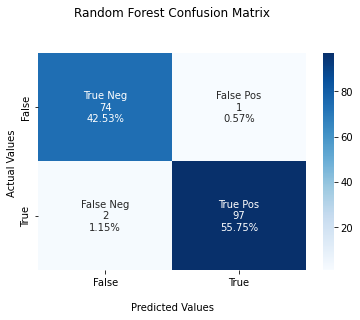

In [24]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, rf_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [25]:
# decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [27]:
param_grid_dt = {
    'criterion':['gini','entropy'],
    'splitter': ['best', 'random'],
}

In [28]:
dtc_RandomGrid = GridSearchCV(estimator = dtc, param_grid = param_grid_dt, cv = 2, verbose=2, n_jobs = -1)
dtc_RandomGrid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [29]:
dtc_RandomGrid.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [30]:
print('Train Accuracy: {}'.format(dtc_RandomGrid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(dtc_RandomGrid.score(X_test,y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9655172413793104


In [31]:
dtc_pred = dtc_RandomGrid.predict(X_test)

In [32]:
print('f1 score: {}'.format(f1_score(y_test, dtc_pred, average='macro')))
print('accuracy score: {}'.format(metrics.accuracy_score(y_test, dtc_pred)))

f1 score: 0.9648484848484848
accuracy score: 0.9655172413793104


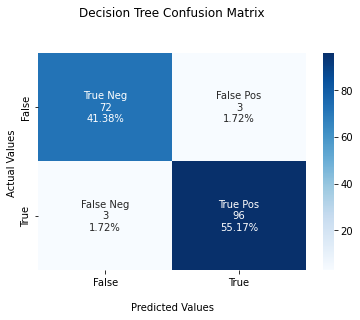

In [33]:
cf_matrix = confusion_matrix(y_test, dtc_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [34]:
# support vector machine, linear kernel

In [35]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [36]:
print('Train Accuracy: {}'.format(svc.score(X_train,y_train)))
print('Test Accuracy: {}'.format(svc.score(X_test,y_test)))

Train Accuracy: 0.9450867052023122
Test Accuracy: 0.9252873563218391


In [37]:
print('f1 score: {}'.format(f1_score(y_test, svc_pred, average='macro')))
print('accuracy score: {}'.format(metrics.accuracy_score(y_test, svc_pred)))

f1 score: 0.9228381374722838
accuracy score: 0.9252873563218391


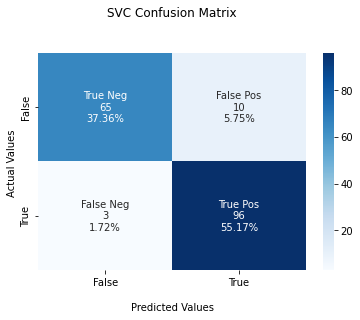

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=145; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=156; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=178; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=178; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=178; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=151; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=190; total time=   0.4s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=145; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=145; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=156; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=178; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=178; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=151; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=151; total time=   0.3s
[CV] END bootstrap=False, m

In [38]:
cf_svc_matrix = confusion_matrix(y_test, svc_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_svc_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_svc_matrix.flatten()/np.sum(cf_svc_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_svc_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('SVC Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()